# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
donors = pd.read_csv("Donors_dataset.csv", header=0, na_values="?")

pd.set_option('display.max_columns', None)
donors.head(3)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,NaN,NaN,.,H,M,2.0,0,P,0,NaN,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2.0,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1.0,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16


## 2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is to check the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.


In [3]:
donors.shape

(19372, 50)

In [4]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   18918 non-null  object 
 7   SES                          18918 non-null  float64
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

There are a total of 19372 entries in the dataset and 50(!) features.

In [5]:
donors.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,SES,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,18918.000000,14980.000000,19372.000000,19372.000000,10562.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.00000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,1.903425,3.907543,0.497729,3.361656,5.005397,1079.871929,341.970215,69.698999,15857.334452,1.029011,30.573921,29.603293,32.852467,0.504439,0.931138,1.983998,0.190127,15.365396,0.230808,11.68547,3.043103,1.730539,19.038900,18.668078,47.570514,104.425716,9.979765,12.858338,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,0.749215,1.864796,0.500008,9.503481,2.815386,960.753448,164.207807,21.711019,8710.630390,4.918297,11.421471,15.120360,17.839765,0.499993,2.545585,1.099346,0.113947,10.167485,0.186230,10.83412,2.046401,1.535521,3.415559,8.558778,22.950158,105.722460,8.688163,8.787758,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-12.000000,2.000000,5.000000,15.000000,1.000000,1.360000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,518.000000,232.000000,60.000000,10869.000000,0.000000,25.000000,20.000000,21.000000,0.000000,0.000000,1.000000,0.105000,10.000000,0.100000,5.00000,2.000000,1.000000,17.000000,11.000000,28.000000,42.000000,4.000000,8.000000,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,2.000000,4.000000,0.000000,0.000000,5.000000,747.000000,311.000000,76.000000,13816.500000,0.000000,31.000000,29.000000,32.000000,1.000000,0.000000,2.000000,0.167000,14.000000,0.200000,10.14000,3.000000,1.000000,18.000000,18.000000,47.000000,79.000000,8.000000,11.200000,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,2.000000,5.000000,1.000000,3.000000,7.000000,1227.000000,417.000000,85.000000,18308.250000,0.000000,37.000000,39.000000,43.000000,1.000000,1.000000,3.000000,0.250000,20.000000,0.333000,16.00000,4.000000,2.000000,21.000000,26.000000,64.000000,132.000000,14.000000,15.000000,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,4.000000,7.000000,1.0000

Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each one of the numerical attributes. We will explore the features further ahead in the project, this is just an initial overview.

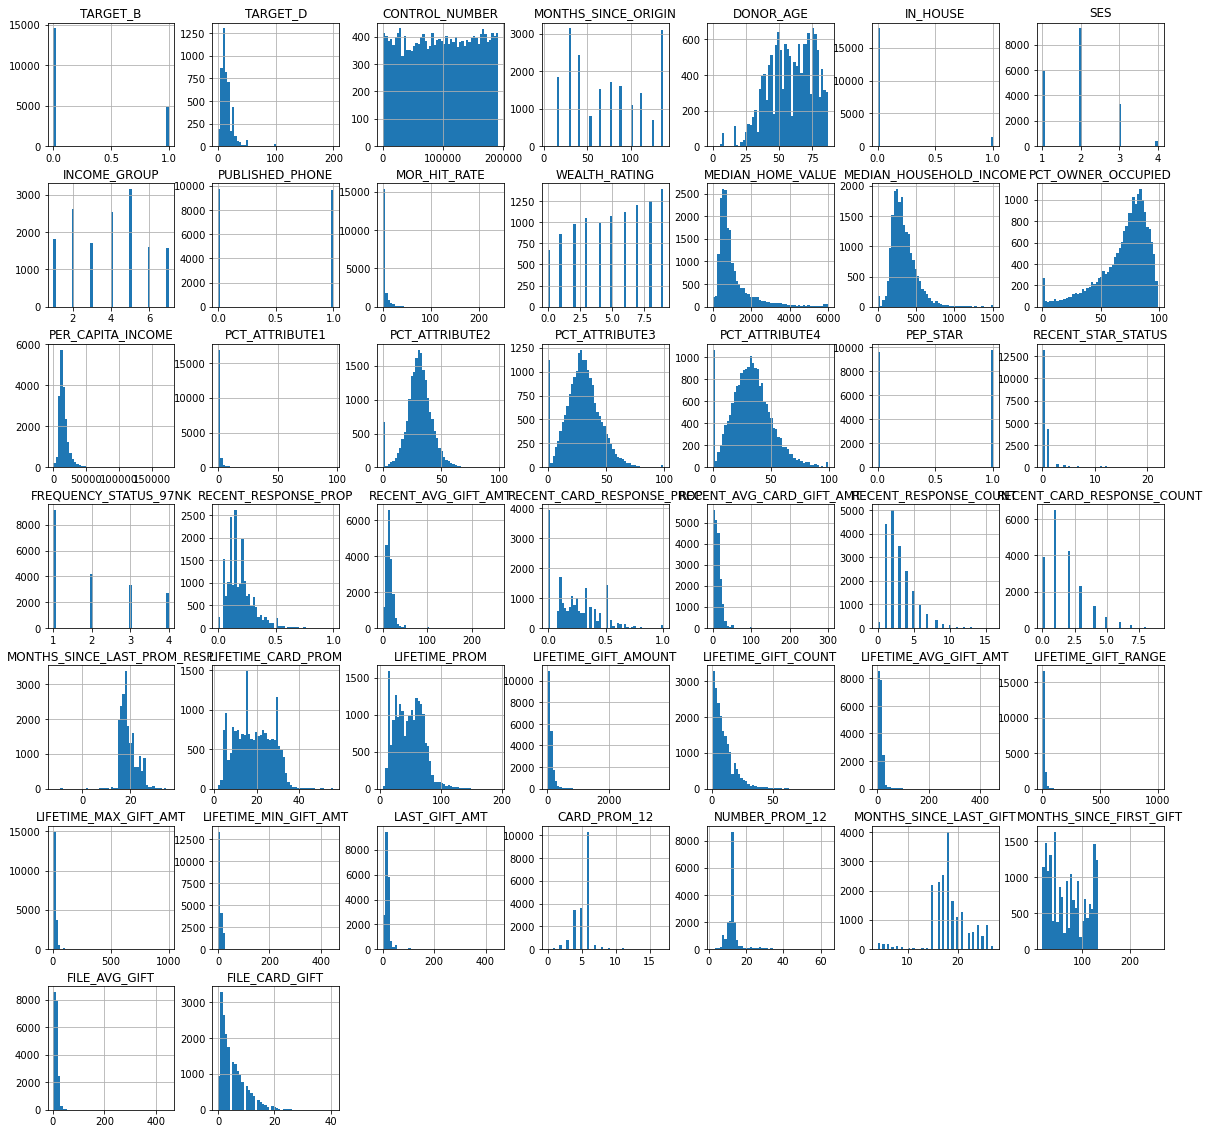

In [6]:
donors.hist(bins=50, figsize=(20,20))
plt.show();

In [7]:
donors.describe(include=np.object)

,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,OVERLAY_SOURCE,RECENCY_STATUS_96NK
count,18918,19372,19372,19372,19372,19372
unique,5,54,2,4,4,6
top,S,40,H,F,B,A
freq,4491,830,10606,10401,8732,11918



After a first look at the dataset and its feature, we can split the variables in two main groups:
+ **Demographic:** these are related to the donor and their demographics. `DONOR_AGE`, `DONOR_GENDER`, `INCOME_GROUP`, `MEDIAN_HOUSEHOLD_INCOME`, `URBANICITY` are some examples of features that pertain to the donor and their social and economic reality.
+ **Donation:** these are related to the donor's donation history and other charity functional features: `PEP_STAR`, `IN_HOUSE`, `PUBLISHED_PHONE`, `FREQUENCY_STATUS_97NK` are some examples of this type.

## 2.1. Checking Duplicated Entries

In [8]:
if donors.shape[0] == len(donors.CONTROL_NUMBER.unique()):
    print('There are no duplicated entries in this dataset.')
else:
    print('There are {} duplicated entries'.format(donors.shape[0] - len(donors.CONTROL_NUMBER.unique())))

There are no duplicated entries in this dataset.


## 2.2. Checking the target variables TARGET_B and TARGET_D 

In [9]:
print("Total number of non-donors (0) = {}, {} percent of total".format(donors[donors['TARGET_B']==0].shape[0], donors[donors['TARGET_B']==0].shape[0]/donors.shape[0]*100))
print("Total number of donors (1) = {}, {} percent of total".format(donors[donors['TARGET_B']==1].shape[0], donors[donors['TARGET_B']==1].shape[0]/donors.shape[0]*100))

Total number of non-donors (0) = 14529, 75.0 percent of total
Total number of donors (1) = 4843, 25.0 percent of total


We can conclude that the data is not balanced; that is, our two target classes from the feature 'TARGET_B', donors (1) and non-donors (0), are not represented equally in the dataset. 
Only a small part of the individuals donated. 
As we will see further ahead in the project, this will imply some restrictions when choosing which performance metrics to measure.

In [10]:
pd.DataFrame(donors['TARGET_D'].value_counts()) #checking the counts of unique values of TARGET_D

,TARGET_D
10.00,941
15.00,591
20.00,577
5.00,503
25.00,392
...,...
16.87,1
101.00,1
13.92,1
5.25,1


In [11]:
pd.DataFrame(donors['TARGET_D'].describe()) #checking some statistical details of TARGET_D

,TARGET_D
count,4843.000000
mean,15.624344
std,12.445137
min,1.000000
25%,10.000000
50%,13.000000
75%,20.000000
max,200.000000


When analysing TARGET_D, we can observe that there were 4843 donations as a response to last year's soliciation, with the mean close to $15.6.

Half of individuals have donated $13 or less, while the max donation summed up to 200 dollars.

## 2.3. Adding DONATION_TYPE to the dataset

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


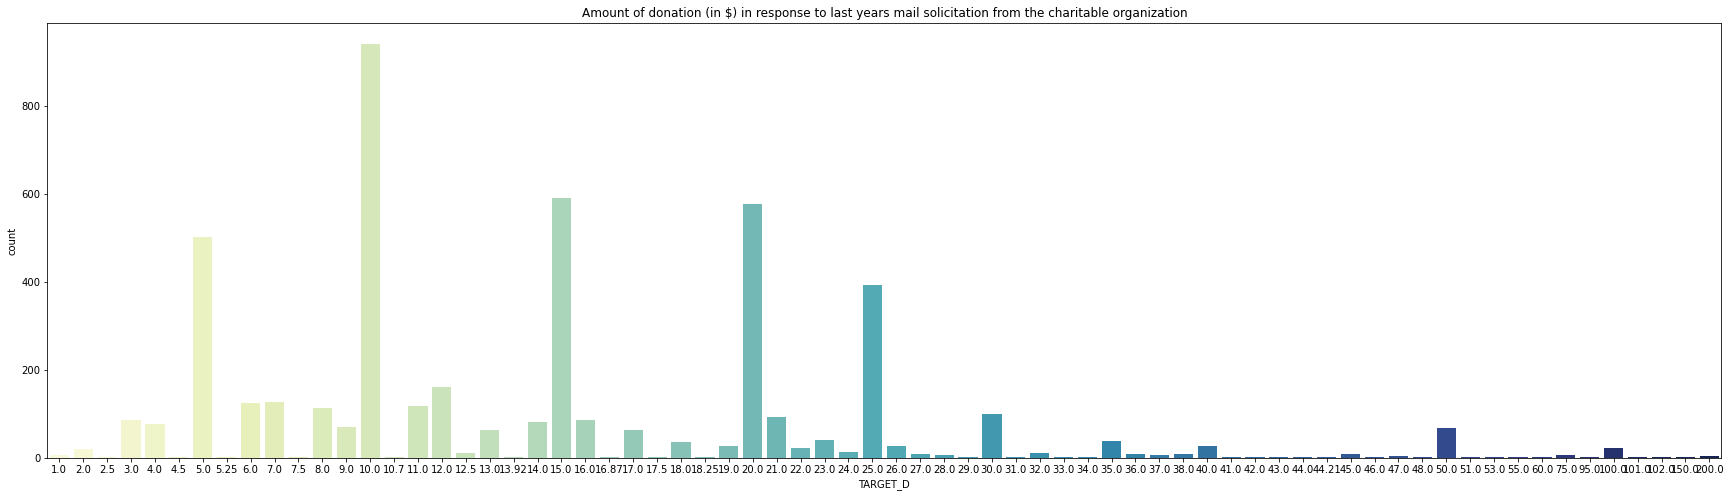

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
g=sns.countplot(donors['TARGET_D'], palette='YlGnBu')
plt.title('Amount of donation (in $) in response to last years mail solicitation from the charitable organization')
g.figure.set_size_inches(30,8)
plt.show();

In [13]:
donors['TARGET_D'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

Based on the data distrubtion, we have taken considered the following cut offs to define a new feature named  `DONATION_TYPE`, whose values describe ranges of the donation amount (DA) reported in feature `TARGET_D` when it takes up a value different that zero, that is, when an individual is a donor:

* `A` - DA >= 50
* `B` - 20 <= DA < 50 
* `C` - 13 <= DA < 20
* `D` - 10 <= DA < 13
* `E` - DA < 10

In [14]:
# creating a list for our classes according to the different threshold donations
thresholds = [
    (donors['TARGET_D']  >= 50),
    (donors['TARGET_D'] < 50) & (donors['TARGET_D']  >= 20),
    (donors['TARGET_D'] < 20) & (donors['TARGET_D']  >= 13),
    (donors['TARGET_D'] < 13) & (donors['TARGET_D']  >= 10),
    (donors['TARGET_D'] < 10)
    ]

# creating a list of the classes
values = ['A', 'B', 'C', 'D', 'E']

# creating a new column, representing an ordinal feature
#using np.select to assign values to DONATION_TYPE using the above lists as arguments
donors['DONATION_TYPE'] = np.select(thresholds, values, default=np.nan)

In [15]:
donors['DONATION_TYPE']

0        nan
1          D
2        nan
3        nan
4        nan
        ... 
19367    nan
19368    nan
19369    nan
19370    nan
19371      A
Name: DONATION_TYPE, Length: 19372, dtype: object

It is important to highlight that when 'DONATION_TYPE' takes up a value different than the classes created above (A,B,C,D,E), it is due to the fact that the individual is a non-donor.

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


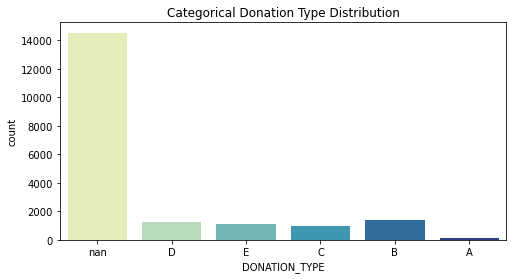

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.countplot(donors['DONATION_TYPE'], palette='YlGnBu')
plt.xlabel('DONATION_TYPE')
plt.title('Categorical Donation Type Distribution')
plt.show();

atenção

We had already known that we were dealing with an imbalanced dataset (75% non-donors represented by the 'nan' column), the above bar chart highlights the high value donations >= 50 dollars were the least common in last year's donation.

## 2.4. Missing Values

In [17]:
na_found=donors.isna().sum().any()
if na_found==True:
    total_na = donors.isnull().sum()
    percent_na = round(donors.isnull().sum()/donors.isnull().count()*100,5)
    donors_df2 = pd.concat([percent_na, total_na], axis=1, keys=["% of NA", "Total NA"])
    dtypes = []
    for i in donors.columns:
        dtype = str(donors[i].dtype)
        dtypes.append(dtype)
    donors_df2['Type'] = dtypes
    donors_df2 = donors_df2.sort_values('% of NA', ascending=False)
donors_df2

,% of NA,Total NA,Type
TARGET_D,75.00000,14529,float64
WEALTH_RATING,45.47801,8810,float64
DONOR_AGE,24.75222,4795,float64
INCOME_GROUP,22.67190,4392,float64
URBANICITY,2.34359,454,object
SES,2.34359,454,float64
MONTHS_SINCE_LAST_PROM_RESP,1.26987,246,float64
TARGET_B,0.00000,0,int64
LIFETIME_AVG_GIFT_AMT,0.00000,0,float64
RECENT_AVG_CARD_GIFT_AMT,0.00000,0,float64


Seven features were found to have missing values. It is important to highlight that the target variable TARGET_D has a considerable number of NAs, totalling 75% of the observations - as confirmed previously, this is due to the fact that 75% of individuals have not donated, hence their amount of donation does not exist.

Additionally,  `WEALTH_RATING`, `INCOME_GROUP`, `SES`, `DONOR_AGE` and `URBANICITY` all have a high number of NA values, with the first three being the most problematic as the percentage of missing entries is above 20 %.

For different features, we will find different imputation methods.

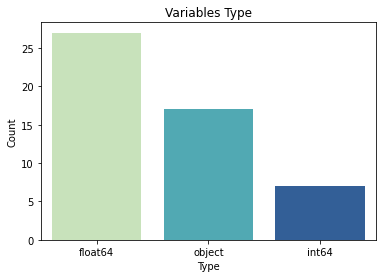

In [18]:
#feature type distribution
fig,ax = plt.subplots()
sns.barplot(data=donors_df2,x=donors_df2.Type.unique(), y=donors_df2.Type.value_counts(),ax=ax, palette='YlGnBu')
ax.set(xlabel='Type', ylabel='Count',title="Variables Type");

In [19]:
 list(donors.columns[donors.isnull().any()]) #getting a list of features with missing values

['TARGET_D',
 'DONOR_AGE',
 'URBANICITY',
 'SES',
 'INCOME_GROUP',
 'WEALTH_RATING',
 'MONTHS_SINCE_LAST_PROM_RESP']

   - Let's start with `DONOR_AGE`, we can impute the mean for this variable for every NA as it does not affect the variable distribution. 

In [20]:
ageMedian = donors["DONOR_AGE"].median()
donors["DONOR_AGE"] = donors["DONOR_AGE"].fillna(ageMedian)
donors["DONOR_AGE"].isnull().sum()

0

In [21]:
donors['DONOR_AGE']=donors['DONOR_AGE'].astype('int64')

   - Next we take a look at `INCOME_GROUP` and `WEALTH_RATING` which are both ordinary variables.

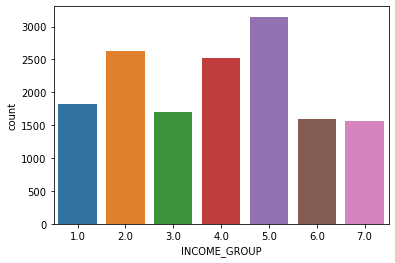

In [22]:
sns.countplot(x=donors['INCOME_GROUP'])
plt.show()

In [23]:
donors['INCOME_GROUP'].value_counts(normalize=True) * 100

5.0    21.021362
2.0    17.530040
4.0    16.862483
1.0    12.162884
3.0    11.341789
6.0    10.620828
7.0    10.460614
Name: INCOME_GROUP, dtype: float64

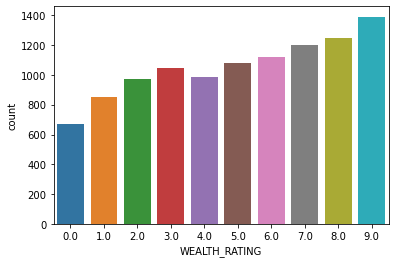

In [24]:
sns.countplot(x=donors['WEALTH_RATING'])
plt.show()

In [25]:
donors['WEALTH_RATING'].value_counts(normalize=True) * 100

9.0    13.160386
8.0    11.815944
7.0    11.352017
6.0    10.575649
5.0    10.206400
3.0     9.903427
4.0     9.344821
2.0     9.221738
1.0     8.085590
0.0     6.334028
Name: WEALTH_RATING, dtype: float64

One option could be to impute the mode to all missing values of these two features. However, as the number of missing values are too high, this would severely impact the dataset and skew the observations towards the most frequent class.
In this case, the mode would refer to classes 5 and 9, for `INCOME_GROUP` and `WEALTH_RATING` respectively.

We also can't just remove the rows with NA values because that would cut almost half of the dataset. A possible solution would be to evaluate if these two features are needed. There could be features that show the same type of information as these two. In this case, we are looking at features that convey economic information about the donors.

Looking at the dataset, that are other features which represent economic data: `PER_CAPITA_INCOME`, `MEDIAN_HOUSEHOLD_INCOME` and `SES`. It can be interesting to look at the correlation between `WEALTH_RATING` and `INCOME_GROUP` and these features.

In [26]:
donors.corrwith(donors["WEALTH_RATING"]).sort_values(ascending=False).head()

WEALTH_RATING              1.000000
MEDIAN_HOUSEHOLD_INCOME    0.603792
PER_CAPITA_INCOME          0.521337
INCOME_GROUP               0.419194
MEDIAN_HOME_VALUE          0.390796
dtype: float64

In [27]:
donors.corrwith(donors["INCOME_GROUP"]).sort_values(ascending=False).head()

INCOME_GROUP               1.000000
MEDIAN_HOUSEHOLD_INCOME    0.428270
WEALTH_RATING              0.419194
PER_CAPITA_INCOME          0.354530
MEDIAN_HOME_VALUE          0.323530
dtype: float64

We have observed that both  `INCOME_GROUP` and `WEALTH_RATING` are positively correlated with the economic features.
We will assume that both of these two features were generated to represent groups based on data from the economic features and, as such, we can remove them from the dataset and still keep the information that these two features convey.

In [28]:
donors = donors.drop(["INCOME_GROUP", "WEALTH_RATING"], axis=1)

   - Moving on to `MONTHS_SINCE_LAST_PROM_RESP`, we'd observed before in the dataset describe method that this feature had negative values. From the dataset description we can see that this feature represents the number of months since the donor's last response. That means that there shouldn't be any negative values.

In [29]:
donors["MONTHS_SINCE_LAST_PROM_RESP"].describe()

count    19126.000000
mean        19.038900
std          3.415559
min        -12.000000
25%         17.000000
50%         18.000000
75%         21.000000
max         36.000000
Name: MONTHS_SINCE_LAST_PROM_RESP, dtype: float64

We should see how many negative values there are.

In [30]:
negSum = 0
for val in donors["MONTHS_SINCE_LAST_PROM_RESP"]:
    if val < 0:
        negSum += 1
print("There are", str(negSum), "negative values in this feature!")

There are 8 negative values in this feature!


In [31]:
donors[donors['MONTHS_SINCE_LAST_PROM_RESP']<0].LIFETIME_CARD_PROM

203      34
5214     17
5807     19
6682     15
8343     15
9601     32
10391    31
13456    18
Name: LIFETIME_CARD_PROM, dtype: int64

There are 8 negative values in `MONTHS_SINCE_LAST_PROM_RESP`. 

After checking `LIFETIME_CARD_PROM`, we confirmed that the entries which had a negative value of `MONTHS_SINCE_LAST_PROM_RESP` actually had positive values representing the total number of card promotions sent to the individual by the charitable organization. With this, we could discard the idea that those individuals had been first time donors.

As such, we will assume that these are due to a low quality data inputation and we will regard them as errors, replaing them by the feature's median: 18.

In [32]:
monthMedian = donors["MONTHS_SINCE_LAST_PROM_RESP"].median()
monthMedian

18.0

In [33]:
donors["MONTHS_SINCE_LAST_PROM_RESP"] = donors["MONTHS_SINCE_LAST_PROM_RESP"].fillna(monthMedian)

In [34]:
donors["MONTHS_SINCE_LAST_PROM_RESP"].isnull().sum()

0

   - For `SES` and `URBANICITY`, we have chosen to replace the missing values by the most common class for each feature. 

In [35]:
donors['SES'].value_counts()

2.0    9284
1.0    5924
3.0    3323
4.0     387
Name: SES, dtype: int64

In [36]:
donors['SES'] = donors['SES'].fillna(donors['SES'].mode()[0])

In [37]:
donors["SES"].isnull().sum()

0

In [38]:
donors['URBANICITY'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
Name: URBANICITY, dtype: int64

In [39]:
donors['URBANICITY'] = donors['URBANICITY'].fillna(donors['URBANICITY'].mode()[0])

In [40]:
donors["SES"].isnull().sum()

0

   - Finally, for TARGET_D, we will first verify if all the null values are indeed from non-donors.

In [41]:
donors[donors["TARGET_B"]==1]["TARGET_D"].isnull().sum()

0

Having confirmed this assumption, we can input missing values with zero. If someone didn't donate then TARGET_B = 0 and, obviously, TARGET_D = 0. Also, if someone has a non-null value for TARGET_D then TARGET_B is 1.

In [42]:
donors["TARGET_D"] = donors["TARGET_D"].fillna(0)

In [43]:
donors["TARGET_D"].isnull().sum()

0

In [44]:
donors.columns[donors.isnull().any()] #sanity check

Index([], dtype='object')

## 2.5. Dropping Features

Looking at the features' descriptions, we can immediately point out some that are meaningless for the problem at hand and, hence, will be dropped:

- CONTROL_NUMBER: this is a unique identifier for each donor, it has no impact in the donation.
- OVERLAY_SOURCE: we will assume that the data source is not relevant for the prediction.
- FILE_AVG_GIFT: this feature is identical to LIFETIME_AVG_GIFT_AMT, according to the dataset info.
- PEP_STAR: which takes up value 1 if the donor has a STAR status and 0 otherwise will be removed as this information is already displayed in the feature 'RECENCY_STATUS_96NK' by the class S and by the remaining ones, respectively.
- RECENT_STAR_STATUS: which takes up value 1 if the donor has reached STAR status 4 years ago and 0 otherwise will be removed as this information is already displayed in the feature 'RECENCY_STATUS_96NK' by the class S and by the remaining ones, respectively.
- CLUSTER_CODE: There are 54 unique values for this variable.Given that this feature reflects socioeconomic status, urbanicity, ethnicity, and other demographic characteristics, we consider that such information is already reflected in other features of this dataset so we will drop it.
- NUMBER_PROM_12: the data illustrated in this feature is already represented by the feature 'CARD_PROM_12'

In [45]:
donors=donors.drop(['CONTROL_NUMBER', 'OVERLAY_SOURCE', 'FILE_AVG_GIFT', 'PEP_STAR', 'RECENT_STAR_STATUS'],axis=1)

In [46]:
donors=donors.drop(['CLUSTER_CODE'], axis=1)

In [47]:
donors=donors.drop(['NUMBER_PROM_12'], axis=1)

We will also look for correlations in the data set and, after analysing pairs of features with a positively high standard correlation coefficient, we have chosen to remove the following features:

- 'MONTHS_SINCE_ORIGIN'
- 'LIFETIME_PROM_CARD'
- 'PER_CAPITA_INCOME'
- 'LIFETIME_GIFT_COUNT'
- 'LIFETIME_MAX_GIFT_AMT'
- 'LIFETIME_MIN_GIFT_AMT'
- 'LIFETIME_GIFT_RANGE'
- 'LIFETIME_PROM'
- 'RECENT_RESPONSE_COUNT'
- 'LIFETIME_GIFT_AMOUNT'

In [48]:
donors_matrix = donors.corr()

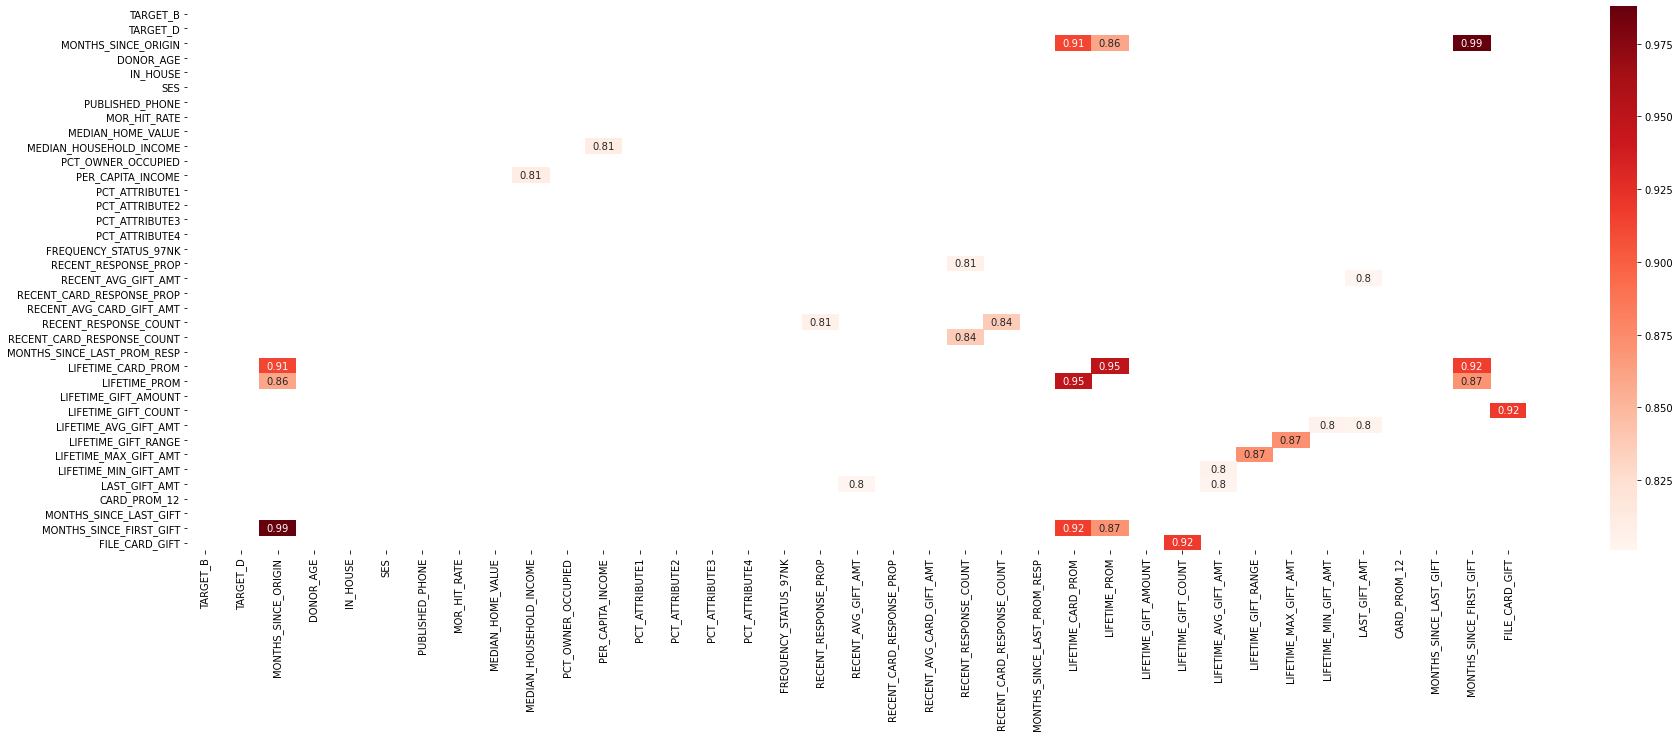

In [49]:
filtered_donors = donors_matrix[((donors_matrix >= .8) | (donors_matrix <= -.8)) & (donors_matrix !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filtered_donors, annot=True, cmap="Reds")

plt.show()

In [50]:
filtered_donors.unstack().sort_values().drop_duplicates()

RECENT_AVG_GIFT_AMT      LAST_GIFT_AMT                 0.801052
LAST_GIFT_AMT            LIFETIME_AVG_GIFT_AMT         0.803911
LIFETIME_AVG_GIFT_AMT    LIFETIME_MIN_GIFT_AMT         0.804668
RECENT_RESPONSE_PROP     RECENT_RESPONSE_COUNT         0.805832
MEDIAN_HOUSEHOLD_INCOME  PER_CAPITA_INCOME             0.811624
RECENT_RESPONSE_COUNT    RECENT_CARD_RESPONSE_COUNT    0.836973
MONTHS_SINCE_ORIGIN      LIFETIME_PROM                 0.860342
MONTHS_SINCE_FIRST_GIFT  LIFETIME_PROM                 0.870775
LIFETIME_MAX_GIFT_AMT    LIFETIME_GIFT_RANGE           0.871837
MONTHS_SINCE_ORIGIN      LIFETIME_CARD_PROM            0.912063
LIFETIME_CARD_PROM       MONTHS_SINCE_FIRST_GIFT       0.916866
LIFETIME_GIFT_COUNT      FILE_CARD_GIFT                0.918308
LIFETIME_PROM            LIFETIME_CARD_PROM            0.948653
MONTHS_SINCE_ORIGIN      MONTHS_SINCE_FIRST_GIFT       0.987825
TARGET_B                 TARGET_B                           NaN
dtype: float64

In [51]:
donors = donors.drop(['MONTHS_SINCE_ORIGIN','LIFETIME_CARD_PROM','PER_CAPITA_INCOME','LIFETIME_GIFT_COUNT',
 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
 'LIFETIME_GIFT_RANGE','LIFETIME_PROM', 'RECENT_RESPONSE_COUNT'], axis=1)

In [52]:
donors = donors.drop(['LIFETIME_GIFT_AMOUNT'], axis=1)

# 3. Exploring Data

- Numerical Attributes

In [53]:
len(donors.FILE_CARD_GIFT.value_counts())

32

According to the statistics below, it seems that the average amount of the most recent donation was 1 dollar higher than the current one (16.6 dollars vs 15.6 dollars). In the last campaign, 50% of the individuals donated at least 15 dollars whereas on this current one half of the individuals donated less than 13 dollars.

In [54]:
donors.loc[donors.LAST_GIFT_AMT !=0].LAST_GIFT_AMT.describe()

count    19297.000000
mean        16.648655
std         11.956016
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max        450.000000
Name: LAST_GIFT_AMT, dtype: float64

In [55]:
donors.loc[donors.TARGET_D !=0].TARGET_D.describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

In [56]:
print('Individuals who had already contributed on average with at least $15 in their lifetime, contributed a total of ${} for this donation, representing {} % of the total donated amount'.format(
    donors.loc[(donors.LIFETIME_AVG_GIFT_AMT >=15)].TARGET_D.sum(), np.round(donors.loc[(donors.LIFETIME_AVG_GIFT_AMT >=15)].TARGET_D.sum()/donors.TARGET_D.sum(),2)*100))

print('Individuals who had already contributed on average with less than $15 in their lifetime, contributed a total of ${} for this donation, representing {} % of the total donated amount'.format(
    donors.loc[(donors.LIFETIME_AVG_GIFT_AMT <15)].TARGET_D.sum(), np.round(donors.loc[(donors.LIFETIME_AVG_GIFT_AMT <15)].TARGET_D.sum()/donors.TARGET_D.sum(),2)*100))

Individuals who had already contributed on average with at least $15 in their lifetime, contributed a total of $30069.03 for this donation, representing 40.0 % of the total donated amount
Individuals who had already contributed on average with less than $15 in their lifetime, contributed a total of $45599.67 for this donation, representing 60.0 % of the total donated amount


In [57]:
print('Individuals who donated lived on avg in more expensive properties, with the mean house value being ${} above those who did not donate.'.format(
np.round(donors.loc[(donors.TARGET_B==1)].MEDIAN_HOME_VALUE.mean()-donors.loc[(donors.TARGET_B==0)].MEDIAN_HOME_VALUE.mean(),2)*100))

Individuals who donated lived on avg in more expensive properties, with the mean house value being $11177.0 above those who did not donate.


In [58]:
print('On average, neighbourhoods with the majority of owner-occupied housing donated ${} less than those who lived in other neighbourhood.'.format(
np.abs(np.round(donors.loc[(donors.TARGET_B==1)&(donors.PCT_OWNER_OCCUPIED >=0.5)].TARGET_D.mean()-donors.loc[(donors.TARGET_B==1)&(donors.PCT_OWNER_OCCUPIED <0.5)].TARGET_D.mean(),2))))

On average, neighbourhoods with the majority of owner-occupied housing donated $0.73 less than those who lived in other neighbourhood.


In [59]:
print("The donors' household income was on avg ${}, which was ${} above those who did not donate.".format(
      np.round(donors.loc[(donors.TARGET_B==1)].MEDIAN_HOME_VALUE.mean()*100),
np.round(donors.loc[(donors.TARGET_B==1)].MEDIAN_HOME_VALUE.mean()-donors.loc[(donors.TARGET_B==0)].MEDIAN_HOME_VALUE.mean(),2)*100))

The donors' household income was on avg $116370.0, which was $11177.0 above those who did not donate.


In [60]:
print("Donors had their first donation on average 6 years prior and during that time they donated ${} on avg each time.".format(
    np.round(donors.loc[(donors.TARGET_B==1)].MOR_HIT_RATE.mean(),2)))
print("For this donation the average was higher (${})".format(np.round(donors.loc[(donors.TARGET_B==1)].TARGET_D.mean(),2)))

Donors had their first donation on average 6 years prior and during that time they donated $3.57 on avg each time.
For this donation the average was higher ($15.62)


In [61]:
#list of numerical variables in the dataset
donors_num = ['CARD_PROM_12','DONOR_AGE','FILE_CARD_GIFT',
                    'LAST_GIFT_AMT','LIFETIME_AVG_GIFT_AMT','MEDIAN_HOME_VALUE',
                    'MEDIAN_HOUSEHOLD_INCOME','MONTHS_SINCE_FIRST_GIFT',
                    'MOR_HIT_RATE', 'RECENT_AVG_CARD_GIFT_AMT','RECENT_AVG_GIFT_AMT',
                    'RECENT_CARD_RESPONSE_COUNT','RECENT_CARD_RESPONSE_PROP','RECENT_RESPONSE_PROP']

## Still to add deep dive: RECENT_AVG_CARD_GIFT_AMT, features 39-42, 44

- Categorical Attributes

In [62]:
donors.DONOR_GENDER =donors.DONOR_GENDER.replace(['A'], 'U')

In [63]:
donors.FREQUENCY_STATUS_97NK.value_counts()

1    9118
2    4191
3    3318
4    2745
Name: FREQUENCY_STATUS_97NK, dtype: int64

In [64]:
donors.HOME_OWNER.value_counts(normalize=True)

H    0.547491
U    0.452509
Name: HOME_OWNER, dtype: float64

In [65]:
donors.loc[donors.TARGET_D !=0].IN_HOUSE.value_counts(normalize=True)

0    0.908321
1    0.091679
Name: IN_HOUSE, dtype: float64

The features PCT_ATTRIBUTES 1-4 which represent neighbour socioeconomic factors are numeric and we will proceed to categorize them using pd.qcut() into 6 equally sized bins.

In [66]:
donors["PCT_ATTRIBUTE1_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE1"], 5)).codes
donors["PCT_ATTRIBUTE2_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE2"], 5)).codes
donors["PCT_ATTRIBUTE3_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE3"], 5)).codes
donors["PCT_ATTRIBUTE4_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE4"], 5)).codes

In [67]:
donors = donors.drop(["PCT_ATTRIBUTE1", "PCT_ATTRIBUTE2", "PCT_ATTRIBUTE3", "PCT_ATTRIBUTE4"],axis=1)

## Falta copiar do notebook antigo as interpretacoes e graficos das features SES, UBANICITY

Most individuals who donated to the lastest campaign where active or Star donors.

In [68]:
donors.loc[(donors.TARGET_D != 0)]["RECENCY_STATUS_96NK"].groupby(donors["RECENCY_STATUS_96NK"]).count()

RECENCY_STATUS_96NK
A    2794
E     132
F     257
L      17
N     264
S    1379
Name: RECENCY_STATUS_96NK, dtype: int64

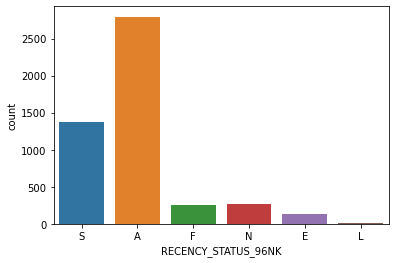

In [69]:
sns.countplot(x='RECENCY_STATUS_96NK', data = donors.loc[(donors.TARGET_D != 0)])
plt.show()

The below bar plot allows us to conclude that even though donors had achieved star status they actually had donated the least (DONATION_TYPE = E) in the last campaign. Active donors represented the group which donated the highest amount (DONATION_TYPE = A ).

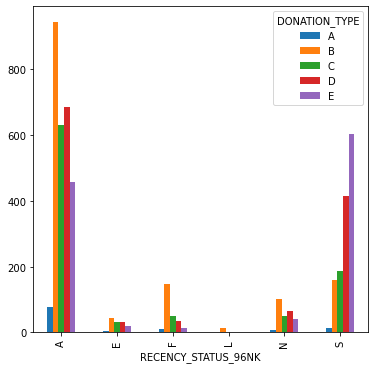

In [70]:
cross_table = pd.crosstab(index=donors.loc[(donors.TARGET_D != 0)]['RECENCY_STATUS_96NK'], columns=donors.loc[(donors.TARGET_D != 0)]["DONATION_TYPE"])
cross_table.plot(kind="bar", figsize=(6,6))
plt.show()

We can assume that the communcation for the campaign was not done via phone due to the fact nearly half of the donors had their phone number published while the remaining did not. Having a phone number in the database seemed not to influence the donation.

In [71]:
donors.loc[(donors.TARGET_D != 0)].TARGET_B.groupby(donors["PUBLISHED_PHONE"]).count()

PUBLISHED_PHONE
0    2446
1    2397
Name: TARGET_B, dtype: int64

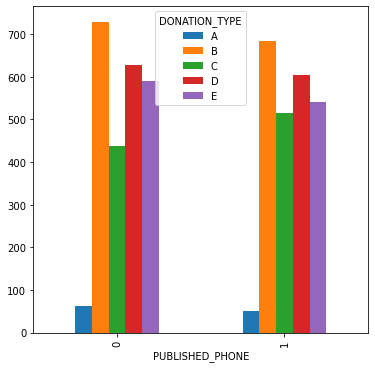

In [72]:
cross_table = pd.crosstab(index=donors.loc[(donors.TARGET_D != 0)]['PUBLISHED_PHONE'], columns=donors.loc[(donors.TARGET_D != 0)]["DONATION_TYPE"])
cross_table.plot(kind="bar", figsize=(6,6))
plt.show()

In [73]:
donors_cat = ['DONOR_GENDER','RECENCY_STATUS_96NK','HOME_OWNER', 'IN_HOUSE',
                    "PCT_ATTRIBUTE1_CAT", "PCT_ATTRIBUTE2_CAT", "PCT_ATTRIBUTE3_CAT", "PCT_ATTRIBUTE4_CAT",
                    'PUBLISHED_PHONE','SES',
                    'URBANICITY']

## 4. Visualizing the Data

For this section, we have the goal to go more in depth to generate some insights and/or confirm some assumptions we had about the data.

We have chosen to keep the below scatterplot as it indicates an interesting point which is the fact that a higher amount of card promotions sent in the last 12 months, doesn't necessarily translate into an individual donating more. In fact, the 3 outliers we observe representing the highest donation amounts were made by individuals which were sent 6 or less cards. 

More isn't always better.

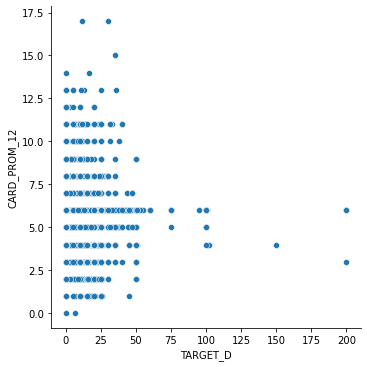

In [74]:
sns.relplot(x="TARGET_D", y="CARD_PROM_12", data=donors)

Adding to the previous point, the below graph illustrates the fact that donors and non-donors followed a relatively similar distribution when it came to the card promotions received (with mean close to 5 calls for both groups) . Thus, receiving more mail, wouldn't necessarily make an individual donate.

In [75]:
donors.loc[(donors.TARGET_B==1)].CARD_PROM_12.mean() #donors avg calls

5.452405533760066

In [76]:
donors.loc[(donors.TARGET_B==0)].CARD_PROM_12.mean() #non donors avg calls

5.338701906531764

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


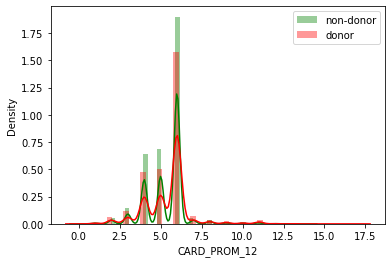

In [77]:
sns.distplot(donors['CARD_PROM_12'][donors['TARGET_B']==0], color='g', label = 'non-donor')
sns.distplot(donors['CARD_PROM_12'][donors['TARGET_B']==1], color='r', label = 'donor')
plt.legend(loc='best')
fig.tight_layout()
plt.show()

In [78]:
#sns.catplot(y="TARGET_B", hue="DONATION_TYPE", kind="count",
 #           palette="pastel", edgecolor=".6",
  #          data=donors)

In [79]:
# sns.scatterplot(x = "MEDIAN_HOUSEHOLD_INCOME", y = 'DONATION_TYPE', hue = "TARGET_B",data = donors, ci=None); 

In [80]:
#sns.swarmplot(x="DONOR_GENDER", y="DONOR_AGE", hue="TARGET_B", data=activedonors, dodge=True, size=10)

The amount of NA's in `DONATION_TYPE` is making it difficult to interpret plots. We will create a subset of the donors dataset with only the non-null values of `DONATION_TYPE`.

In [81]:
activeIndex = []
for i in donors.index:
    if donors["TARGET_D"][i] != 0.0:
        activeIndex.append(i)
        
len(activeIndex)

4843

In [82]:
activedonors = donors.loc[activeIndex]

In [83]:
activedonors = donors.loc[activeIndex]
activedonors.head(2)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE,PCT_ATTRIBUTE1_CAT,PCT_ATTRIBUTE2_CAT,PCT_ATTRIBUTE3_CAT,PCT_ATTRIBUTE4_CAT
1,1,10.0,79,0,R,2.0,H,M,0,0,334,212,72,S,2,0.235,15.0,0.250,15.0,2,11.0,14.72,17.0,7,7,122,12,D,0,2,1,1
7,1,5.0,79,0,C,2.0,H,F,0,0,1004,189,95,A,4,0.400,5.0,0.444,5.0,4,12.0,5.05,5.0,9,9,91,8,E,0,2,2,2


Below, it is interesting to point out that even though males are the biggest gender across this dataset, females donors are more frequent than males one, even though the average value of the donation is lower. 

Males donated less frequently but on a higher dollar amount (16.2 dollars compared to $15 from females and unknown).

## wrong plot below..

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


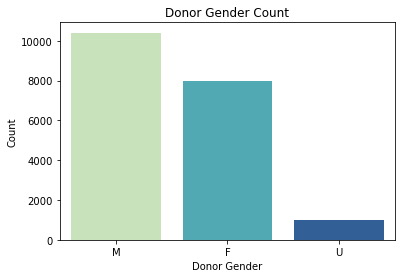

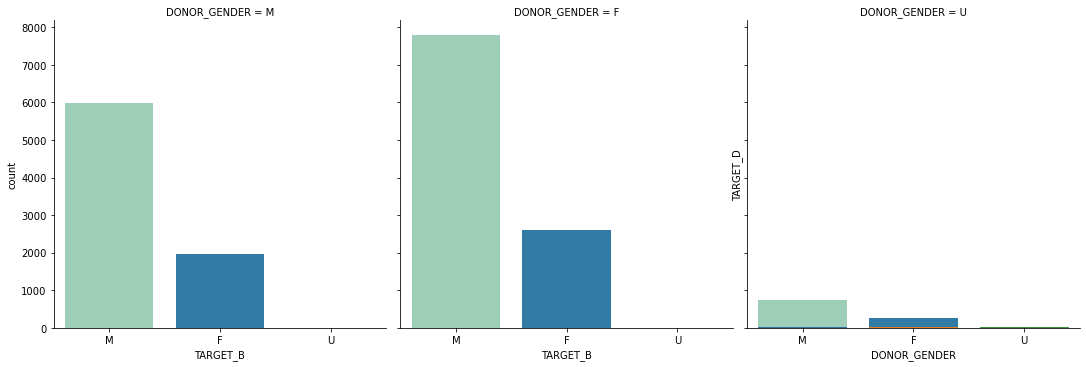

In [84]:
fig,ax = plt.subplots()
sns.barplot(data=donors,x=donors.DONOR_GENDER.unique(), y=donors.DONOR_GENDER.value_counts(),ax=ax, palette='YlGnBu')
ax.set(xlabel='Donor Gender', ylabel='Count',title="Donor Gender Count")
sns.catplot("TARGET_B", col = "DONOR_GENDER", col_wrap = 3,data = donors,kind = "count", palette='YlGnBu')
#sns.catplot("TARGET_D", col = "DONOR_GENDER", col_wrap = 3,data = donors,kind = "bar", palette='YlGnBu')

sns.barplot(y=activedonors.TARGET_D, x= activedonors.DONOR_GENDER, data=activedonors)
plt.show();

In [85]:
activedonors["TARGET_D"].groupby(activedonors["DONOR_GENDER"]).mean().sort_values(ascending=False)

DONOR_GENDER
U    16.313272
M    16.225061
F    15.100774
Name: TARGET_D, dtype: float64

The below plot leaves the question hanging - was last year's card promotion effective? 

As we can observe, the distribution of the lifetime average donation in dollars for donors and non-donors was considerabily similar. This would mean that individuals with similar donation habits, last year acted completely differently. Ideally we would think that the charity organization could detect and target more effeciently those with previous high donation past and get them to donate. 

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


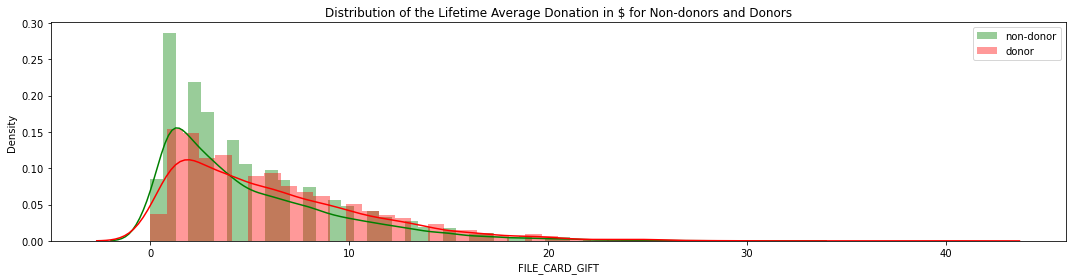

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))
sns.distplot(donors['FILE_CARD_GIFT'][donors['TARGET_B']==0], color='g', label = 'non-donor')
sns.distplot(donors['FILE_CARD_GIFT'][donors['TARGET_B']==1], color='r', label = 'donor')
plt.legend(loc='best')
plt.title('Distribution of the Lifetime Average Donation in $ for Non-donors and Donors')
fig.tight_layout()
plt.show() 

In [87]:
activedonors["TARGET_D"].groupby(activedonors["FREQUENCY_STATUS_97NK"]).mean().sort_values(ascending=False)

FREQUENCY_STATUS_97NK
1    20.506009
2    16.995739
3    11.440678
4     9.553960
Name: TARGET_D, dtype: float64

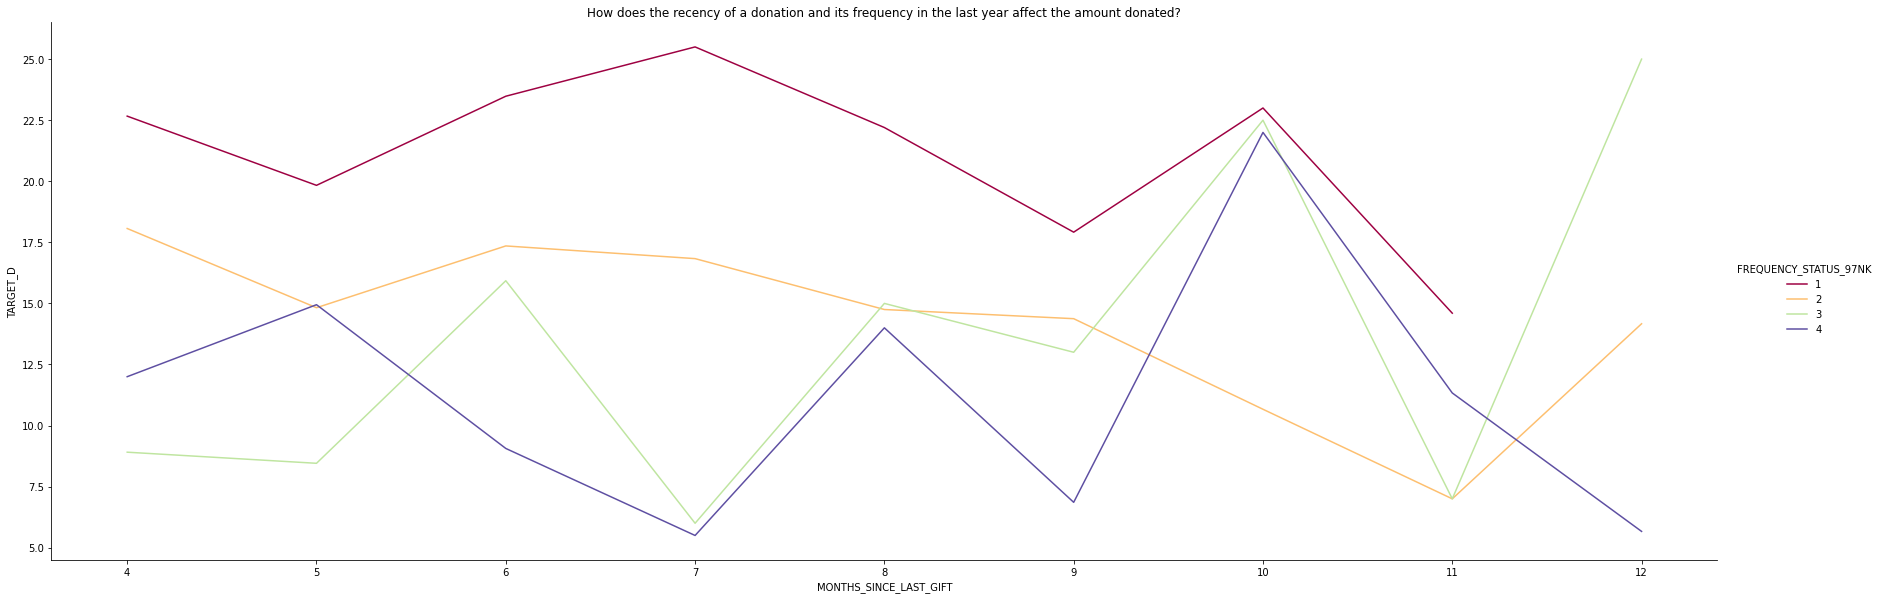

In [88]:
sns.relplot(
    data=activedonors[activedonors.MONTHS_SINCE_LAST_GIFT<=12],
    x="MONTHS_SINCE_LAST_GIFT", y="TARGET_D", hue= 'FREQUENCY_STATUS_97NK', kind='line', facet_kws=dict(sharex=False),
    height=8, aspect=3, ci=None, palette='Spectral')
plt.title('How does the recency of a donation and its frequency in the last year affect the amount donated?')
plt.show();

Generally, higher donations in dollar amount were made by individuals who had donated once in the past 12 months.


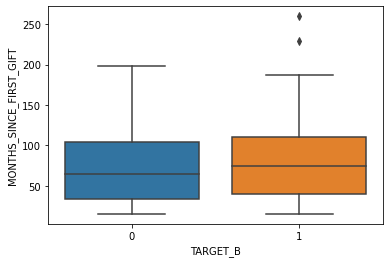

In [89]:
sns.boxplot(x='TARGET_B', y='MONTHS_SINCE_FIRST_GIFT', data=donors)
plt.show()

The box plot above allows us to draw the conclusion that people who donated in the last donation drive have, in general, donated for the first time a longer time ago than non-donors.

In [90]:
def plot_categorical(var, data=donors):
    """
    Creates a count plot, a bar plot for DONATION_TYPE, the mean for TARGET_D and a boxplot for TARGET_D for a 
    categorical variable of the donors dataset. 
    Requires: var is a string, the name of a column of the donors dataset.
    """
    # countplot
    sns.countplot(x=var, data = data)
    plt.show()
    
    # barplot
    cross_table = pd.crosstab(index=data[var], columns=data["DONATION_TYPE"])
    cross_table.plot(kind="bar", figsize=(6,6))
    plt.show()
    
    # boxplot
    sns.boxplot(x=var, y='TARGET_D', data=data)
    plt.show()
    
    # mean
    mean = data["TARGET_D"].groupby(data[var]).mean().sort_values(ascending=False)
    print(mean)

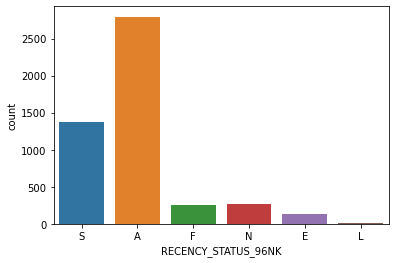

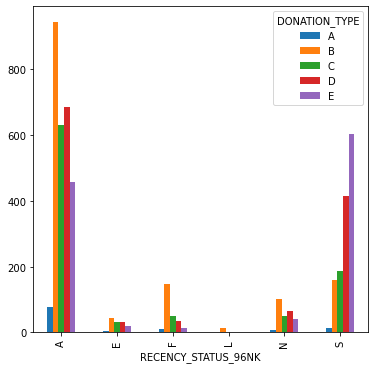

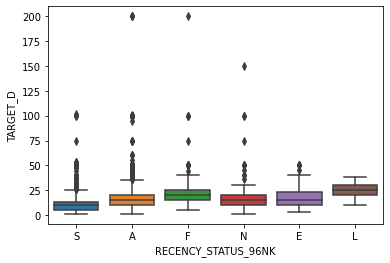

RECENCY_STATUS_96NK
L    24.764706
F    21.729416
N    17.654167
E    17.136364
A    16.995004
S    11.063452
Name: TARGET_D, dtype: float64


In [91]:
plot_categorical('RECENCY_STATUS_96NK',data=activedonors)

In [98]:
sns.barplot(y='DONATION_TYPE', x='RECENCY_STATUS_96NK', data=activedonors)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
cmap = plt.cm.get_cmap('Reds')
activedonors.plot(kind='scatter',x='MEDIAN_HOUSEHOLD_INCOME', y='MEDIAN_HOME_VALUE', alpha=0.4,
           figsize=(10,7), s=activedonors['FILE_CARD_GIFT'], label='FILE_CARD_GIFT',
           c='TARGET_D',  colorbar=True, colormap='jet',
           sharex=False)
plt.show();

# correct plot below..

In [ ]:
cmap = plt.cm.get_cmap('Reds')
activedonors.plot(kind='scatter',x='TARGET_D', y='PCT_ATTRIBUTE1_CAT', alpha=0.4,
           figsize=(10,7),
           sharex=False)
plt.show();

In [ ]:
#sns.scatterplot(data=donors,
 #   x="HOME_OWNER", y="TARGET_B")


#sns.pairplot(donors[['HOME_OWNER','TARGET_D']], hue=donors["TARGET_B"])

## Falta explicar melhor os graficos 

## Task 1 (Supervised Learning) - Predicting Donation and Donation Type

In this task you should target 3 classification tasks:
1. **Predicting  Donation (binary classification task)** - TARGET_B - Hugo; 
2. **Predicting Donation TYPE (multiclass classification)** - DONATION_TYPE - Paulo; and
3. **Train specialized models for SES (socioeconomic classification)** - SES - Filipe.

**You should:**

* Choose **one classifier in each category**: Tree models, Rule models, Linear models, Distance-based models, and Probabilistic models.
* Use cross-validation to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

# Task 1.1) Predicting Donation (binary classification task) - TARGET_B

We had already previously observed the feature TARGET_B, we were dealing with an imbalanced data set. 
When learning from data sets that contain very few instances of the minority class, in many cases the algorithm tends to favor the majority class while the minority class usually represents the most important concept to be learned (individuals who donated). 

We have chosen to handle the imbalanced data with **SMOTE** (synthetic minority oversampling technique), an oversampling method add samples to original imbalanced dataset to balance the size of the minority and majority classes.

In [99]:
donors.head(2)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE,PCT_ATTRIBUTE1_CAT,PCT_ATTRIBUTE2_CAT,PCT_ATTRIBUTE3_CAT,PCT_ATTRIBUTE4_CAT
0,0,0.0,87,0,S,2.0,H,M,0,0,554,294,76,A,1,0.067,15.0,0.00,0.0,0,26.0,8.49,15.0,5,26,92,7,nan,0,0,0,0
1,1,10.0,79,0,R,2.0,H,M,0,0,334,212,72,S,2,0.235,15.0,0.25,15.0,2,11.0,14.72,17.0,7,7,122,12,D,0,2,1,1


In [100]:
#cat features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
cat_features_final = encoder.fit_transform(donors[donors_cat])
column_name = encoder.get_feature_names(donors_cat)
one_hot_encoded_cat =  pd.DataFrame(cat_features_final, columns= column_name)
print(one_hot_encoded_cat.shape)

(19372, 44)


In [101]:
# num features - scalling
numericalfeatures = ['CARD_PROM_12','DONOR_AGE','FILE_CARD_GIFT',
                    'LAST_GIFT_AMT','LIFETIME_AVG_GIFT_AMT','MEDIAN_HOME_VALUE',
                    'MEDIAN_HOUSEHOLD_INCOME','MONTHS_SINCE_FIRST_GIFT',
                    'MOR_HIT_RATE', 'RECENT_AVG_CARD_GIFT_AMT','RECENT_AVG_GIFT_AMT',
                    'RECENT_CARD_RESPONSE_COUNT','RECENT_CARD_RESPONSE_PROP','RECENT_RESPONSE_PROP']

- **Feature Scaling** : As we have vastly different ranges for the numerical data, it is important to scale every value to the same range (0 for the minimum, 1 for the maximum).

In [102]:
donors_num = donors[['CARD_PROM_12','DONOR_AGE','FILE_CARD_GIFT',
                    'LAST_GIFT_AMT','LIFETIME_AVG_GIFT_AMT','MEDIAN_HOME_VALUE',
                    'MEDIAN_HOUSEHOLD_INCOME','MONTHS_SINCE_FIRST_GIFT',
                    'MOR_HIT_RATE', 'RECENT_AVG_CARD_GIFT_AMT','RECENT_AVG_GIFT_AMT',
                    'RECENT_CARD_RESPONSE_COUNT','RECENT_CARD_RESPONSE_PROP','RECENT_RESPONSE_PROP']]

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(donors_num)

# creating a scaled dataframe
donors_num_scaled = pd.DataFrame(scaled)
donors_num_scaled.columns = donors_num.columns

In [104]:
donors_num_scaled.shape

(19372, 14)

In [105]:
X = pd.concat([donors_num_scaled, one_hot_encoded_cat], axis=1)

In [106]:
X.head(2)

,CARD_PROM_12,DONOR_AGE,FILE_CARD_GIFT,LAST_GIFT_AMT,LIFETIME_AVG_GIFT_AMT,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,MONTHS_SINCE_FIRST_GIFT,MOR_HIT_RATE,RECENT_AVG_CARD_GIFT_AMT,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_PROP,DONOR_GENDER_F,DONOR_GENDER_M,DONOR_GENDER_U,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S,HOME_OWNER_H,HOME_OWNER_U,IN_HOUSE_0,IN_HOUSE_1,PCT_ATTRIBUTE1_CAT_0,PCT_ATTRIBUTE1_CAT_1,PCT_ATTRIBUTE1_CAT_2,PCT_ATTRIBUTE1_CAT_3,PCT_ATTRIBUTE1_CAT_4,PCT_ATTRIBUTE2_CAT_0,PCT_ATTRIBUTE2_CAT_1,PCT_ATTRIBUTE2_CAT_2,PCT_ATTRIBUTE2_CAT_3,PCT_ATTRIBUTE2_CAT_4,PCT_ATTRIBUTE3_CAT_0,PCT_ATTRIBUTE3_CAT_1,PCT_ATTRIBUTE3_CAT_2,PCT_ATTRIBUTE3_CAT_3,PCT_ATTRIBUTE3_CAT_4,PCT_ATTRIBUTE4_CAT_0,PCT_ATTRIBUTE4_CAT_1,PCT_ATTRIBUTE4_CAT_2,PCT_ATTRIBUTE4_CAT_3,PCT_ATTRIBUTE4_CAT_4,PUBLISHED_PHONE_0,PUBLISHED_PHONE_1,SES_1.0,SES_2.0,SES_3.0,SES_4.0,URBANICITY_C,URBANICITY_R,URBANICITY_S,URBANICITY_T,URBANICITY_U
0,0.294118,1.000000,0.170732,0.033333,0.015892,0.092333,0.196000,0.314286,0.0,0.00,0.057692,0.000000,0.00,0.067,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.411765,0.908046,0.292683,0.037778,0.029779,0.055667,0.141333,0.436735,0.0,0.05,0.057692,0.222222,0.25,0.235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [107]:
y_TARGET_B = donors.TARGET_B
y_TARGET_B

0        0
1        1
2        0
3        0
4        0
        ..
19367    0
19368    0
19369    0
19370    0
19371    1
Name: TARGET_B, Length: 19372, dtype: int64

In [108]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y_TARGET_B.shape))

Shape of X: (19372, 58)
Shape of y: (19372,)


In [109]:
#!pip install imblearn

# Addressing Class Imbalances

Before OverSampling, counts of label '1': 4843
Before OverSampling, counts of label '0': 14529 



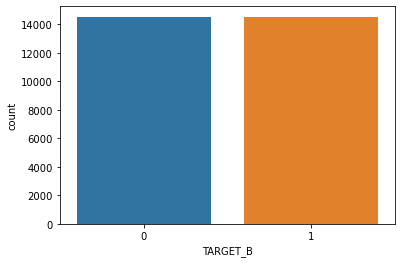

After OverSampling, counts of label '1': 14529
After OverSampling, counts of label '0': 14529


In [110]:
from sklearn.utils import resample


print("Before OverSampling, counts of label '1': {}".format(donors[donors['TARGET_B']==1].shape[0]))
print("Before OverSampling, counts of label '0': {} \n".format(donors[donors['TARGET_B']==0].shape[0]))

# Separating majority and minority classes
df_majority = donors[donors['TARGET_B']==0]
df_minority = donors[donors['TARGET_B']==1]


# Upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=donors[donors['TARGET_B']==0].shape[0],    # to match majority class
                                 random_state=0) # reproducible results
 
# Combining majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Displaying new class counts
df_upsampled.TARGET_B.value_counts()

# Visualizing new balance
sns.countplot(x=df_upsampled['TARGET_B'])
plt.show()

print("After OverSampling, counts of label '1': {}".format(df_upsampled[df_upsampled['TARGET_B']==1].shape[0]))
print("After OverSampling, counts of label '0': {}".format(df_upsampled[df_upsampled['TARGET_B']==0].shape[0]))

In [111]:
df_upsampled.sort_index(ascending=True).head(2)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE,PCT_ATTRIBUTE1_CAT,PCT_ATTRIBUTE2_CAT,PCT_ATTRIBUTE3_CAT,PCT_ATTRIBUTE4_CAT
0,0,0.0,87,0,S,2.0,H,M,0,0,554,294,76,A,1,0.067,15.0,0.00,0.0,0,26.0,8.49,15.0,5,26,92,7,nan,0,0,0,0
1,1,10.0,79,0,R,2.0,H,M,0,0,334,212,72,S,2,0.235,15.0,0.25,15.0,2,11.0,14.72,17.0,7,7,122,12,D,0,2,1,1


## SMOTE - ignorar

In [112]:
"""
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, test_size=0.2, random_state=0)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
"""

'\nfrom imblearn.over_sampling import SMOTE\n\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, test_size=0.2, random_state=0)\n\nprint("Shape of X_train: ", X_train.shape)\nprint("Shape of y_train: ", y_train.shape)\nprint("Shape of X_test: ", X_test.shape)\nprint("Shape of y_test: ", y_test.shape)\n'

In [113]:
"""
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))
"""

'\nprint("Before OverSampling, counts of label \'1\': {}".format(sum(y_train==1)))\nprint("Before OverSampling, counts of label \'0\': {} \n".format(sum(y_train==0)))\n\nsm = SMOTE(random_state=2)\nX_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())\n\nprint(\'After OverSampling, the shape of train_X: {}\'.format(X_train_smote.shape))\nprint(\'After OverSampling, the shape of train_y: {} \n\'.format(y_train_smote.shape))\n\nprint("After OverSampling, counts of label \'1\': {}".format(sum(y_train_smote==1)))\nprint("After OverSampling, counts of label \'0\': {}".format(sum(y_train_smote==0)))\n'

# FALTA explicar melhor qual a metric para usar

We will patricularly take a closer look at the **Recall** score, which indicates the % of the passengers who were classified as donors and who had actually donated.

In [114]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, random_state=0, test_size=0.20)

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, test_size=0.2, random_state=0)

<i>**1.1.a) Tree Model - Decision Tree**</i>

We will use grid search with cross-validation (with the help of the GridSearchCV from scikit-learn) to find good hyperparameter values for our DecisionTreeClassifier model.

We will train our model on the full training set using these hyperparameters, and measure then model’s performance on the test set.

In [118]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 
param_grid = { 'max_depth' : list(range(1, 20)),
             'max_features':list(range(1,50,5)),
             'criterion':list(['gini','entropy'])}        
grid_search_dt= GridSearchCV(dt,param_grid=param_grid,cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                          46]})

In [119]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=11)

In [120]:
grid_search_dt.best_score_

0.7507905776056794

In [124]:
y_pred = grid_search_dt.predict(X_test)

In [125]:
confusion_matrix_test = confusion_matrix(y_pred, y_test) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

Confusion Matrix Test Set
[[2905  970]
 [   0    0]]
In the test set:
2905 individuals were correctly classified as 'not-donors' (TN).
0 individuals were correctly classified as 'donors' (TP).
970 individuals were wrongly classified as 'donors' (FP).
0 individuals were wrongly classified as 'not-donors' (FN).


In [127]:
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))
precision_test = precision_score(y_test, y_pred)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))
recall_test = recall_score(y_test,y_pred)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))
f1_test = f1_score(y_test,y_pred) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba = grid_search_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

Accuracy =  0.7496774193548387
The model predicted 74.97% of the individuals correctly in the test set.
The model predicted correctly that an individual will donate 0.0% of the times in the test set.
The model predicted the donation of 0.0% of the passengers who actually donated in the test set.
The F1 score of the model is 0.0


C:\Users\filip\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The 'positive class'/'1' in our model happens when an individual donated, so ideally we want to optimize it for sensitivity (TPR). This is due to the fact that False Positives (donors who are predicted as 'non-donors') are more acceptable than False Negatives ('non-donors' who are predicted as to have 'donors').

However if we want to increase the recall/sensitivy of our model, this may result in a decrease of the precision (depending on the threshold).

**1.1.a) Tree Model - Random Forest**

In [128]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:  5.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [129]:
grid_search_rf.best_score_

0.75027421956329

In [130]:
y_pred_rf = grid_search_rf.predict(X_test)

In [131]:
confusion_matrix_test = confusion_matrix(y_pred_rf, y_test) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

Confusion Matrix Test Set
[[2905  970]
 [   0    0]]
In the test set:
2905 individuals were correctly classified as 'not-donors' (TN).
0 individuals were correctly classified as 'donors' (TP).
970 individuals were wrongly classified as 'donors' (FP).
0 individuals were wrongly classified as 'not-donors' (FN).


In [132]:
accuracy_test = accuracy_score(y_test, y_pred_rf)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))

precision_test = precision_score(y_test, y_pred_rf)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))

recall_test = recall_score(y_test,y_pred_rf)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))

f1_test = f1_score(y_test,y_pred_rf) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba_rf = grid_search_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba_rf)
roc_auc = auc(fpr, tpr)

Accuracy =  0.7496774193548387
The model predicted 74.97% of the individuals correctly in the test set.
The model predicted correctly that an individual will donate 0.0% of the times in the test set.
The model predicted the donation of 0.0% of the passengers who actually donated in the test set.
The F1 score of the model is 0.0


C:\Users\filip\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The 'positive class'/'1' in our model happens when an individual donated, so ideally we want to optimize it for sensitivity (TPR).
This is due to the fact that False Positives (donors who are predicted as 'non-donors') are more acceptable than False Negatives ('non-donors' who are predicted as to have 'donors').

However if we want to increase the recall/sensitivy of our model, this may result in a decrease of the precision (depending on the threshold).

<i>**1.1.b) Distance based Model - KNN**</i>

In [133]:
from sklearn.neighbors import KNeighborsClassifier 

In [134]:
knn = KNeighborsClassifier()
param_grid = { 'n_neighbors' : list(range(1, 20)) }

grid_search = GridSearchCV(knn,param_grid=param_grid,cv=3, scoring='recall')
grid_search.fit(X_train_smote, y_train_smote)
pred=grid_search.predict(X_test) 

NameError: name 'X_train_smote' is not defined

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
y_pred_knn=grid_search.predict(X_test) 

In [ ]:
confusion_matrix_test = confusion_matrix(y_pred_knn, y_test) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_knn)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))

precision_test = precision_score(y_test, y_pred_knn)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))

recall_test = recall_score(y_test,y_pred_knn)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))

f1_test = f1_score(y_test,y_pred_knn) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba_knn = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba_knn)
roc_auc = auc(fpr, tpr)

<i>**1.1.c) Linear Model - Logistic Regression**</i>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
logit_clf = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [ ]:
y_predict_logit_clf = cross_val_predict(logit_clf, X_train, y_train, cv=10)

In [ ]:
confusion_matrix_test = confusion_matrix(y_predict_logit_clf, y_train) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_knn)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))

precision_test = precision_score(y_test, y_pred_knn)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))

recall_test = recall_score(y_test,y_pred_knn)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))

f1_test = f1_score(y_test,y_pred_knn) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba_knn = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba_knn)
roc_auc = auc(fpr, tpr)

<i>**1.1.d) Rule Model - Naive Bayes**</i>

<i>**1.1.e) Probabilistic Model**</i>

In [ ]:
from sklearn.naive_bayes import GaussianNB

#k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
gnb_clf = GaussianNB()
cross_val_score(gnb_clf, X_train, y_train, cv=10, n_jobs=1)

## Task 1.2) Predicting Donation TYPE (multiclass classification) - DONATION_TYPE

## Task 1.3) Training specialized models for SES (socioeconomic classification) - SES

In [ ]:
donors["SES"].unique()

In [ ]:
ses1 = donors[donors["SES"]==1].drop("TARGET_D", axis=1)
ses2 = donors[donors["SES"]==2].drop("TARGET_D", axis=1)
ses3 = donors[donors["SES"]==3].drop("TARGET_D", axis=1)
ses4 = donors[donors["SES"]==4].drop("TARGET_D", axis=1)

In [ ]:
ses1

In [ ]:
ses2

In [ ]:
ses3

In [ ]:
ses4

In [ ]:
y_SES = donors.SES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_SES, test_size=0.2, random_state=0)

## Task 2 (Unsupervised Learning) - Characterizing Donors and Donation Type

In this task you should **use unsupervised learning algorithms and try to characterize donors (people who really did a donation) and their donation type**. You can use:
* **Association rule mining** to find **associations between the features and the target Donation/DonationTYPE**.
* **Clustering algorithms to find similar groups of donors**. Is it possible to find groups of donors with the same/similar DonationTYPE?
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out ?

## 2.1. Preprocessing Data for Association Rule Mining

# 3. Final Comments and Conclusions